Datasets are obtained from:

https://github.com/MoH-Malaysia/covid19-public/

https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations


# Importing the data
Since the data is frequently updated, we will grab the data directly from the site instead of having to download the csv files manually to perform the analysis. The other good part about this is that the analysis done in on the latest data provided. 

In [5]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv"
s=requests.get(url).content
tests=pd.read_csv(io.StringIO(s.decode('utf-8')))
tests.to_csv('dataset/tests_malaysia.csv')

In [6]:
url="https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv"
s=requests.get(url).content
cases=pd.read_csv(io.StringIO(s.decode('utf-8')))
cases.to_csv('dataset/cases_malaysia.csv')

In [7]:
url="https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv"
s=requests.get(url).content
state_cases=pd.read_csv(io.StringIO(s.decode('utf-8')))
state_cases.to_csv('dataset/cases_state.csv')

In [8]:
url="https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/mysejahtera/trace_malaysia.csv"
s=requests.get(url).content
casual_contacts=pd.read_csv(io.StringIO(s.decode('utf-8')))
casual_contacts.to_csv('dataset/trace_malaysia.csv')

In [9]:
url="https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv"
s=requests.get(url).content
deaths_public=pd.read_csv(io.StringIO(s.decode('utf-8')))
deaths_public.to_csv('dataset/deaths_malaysia.csv')

In [10]:
url="https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv"
s=requests.get(url).content
deaths_state=pd.read_csv(io.StringIO(s.decode('utf-8')))
deaths_state.to_csv('dataset/death_state.csv')

In [11]:
url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
s=requests.get(url).content
vaccination_who=pd.read_csv(io.StringIO(s.decode('utf-8')))
vaccination_who.to_csv('dataset/vaccinations.csv')

In [12]:
url="https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_state.csv"
s=requests.get(url).content
tests_state=pd.read_csv(io.StringIO(s.decode('utf-8')))
tests_state.to_csv('dataset/tests_state.csv')

In [13]:
url='https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv'
s=requests.get(url).content
population=pd.read_csv(io.StringIO(s.decode('utf-8')))
population.to_csv('dataset/population.csv')

In [14]:
population

,state,idxs,pop,pop_18,pop_60
0,Malaysia,0,32657400,23409600,3502000
1,Johor,1,3781000,2711900,428700
2,Kedah,2,2185100,1540600,272500
3,Kelantan,3,1906700,1236200,194100
4,Melaka,4,932700,677400,118500
5,Negeri Sembilan,5,1128800,814400,145000
6,Pahang,6,1678700,1175800,190200
7,Pulau Pinang,7,1773600,1367200,239200
8,Perak,8,2510300,1862700,397300
9,Perlis,9,254900,181200,35100


# EDA

## Factors that correlates to the number of new cases
In this section we will see the correlation between the variables which may be related to the rise of new cases.

In [15]:
import numpy as np



```
# This is formatted as code
```

### Data Cleaning

#### Making a backup of the DataFrame

In [16]:
df_tests=tests.copy()
df_cases=cases.copy()
df_death_public=deaths_public.copy()
df_casual_contacts=casual_contacts.copy()

In [17]:
df_cases.tail()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
586,2021-09-02,20988,1,23473,0.0,5.0,351.0,112.0,52.0,81.0,1110.0
587,2021-09-03,19378,14,22399,0.0,5.0,562.0,64.0,12.0,102.0,1191.0
588,2021-09-04,19057,10,21582,0.0,4.0,250.0,8.0,100.0,54.0,886.0
589,2021-09-05,20396,8,20573,0.0,6.0,447.0,98.0,23.0,41.0,1385.0
590,2021-09-06,17352,8,20201,0.0,0.0,204.0,63.0,23.0,71.0,1015.0


#### Check for null values for all DataFrames

In [18]:
print(df_tests.isna().sum())
print('\n')
print(df_cases.isna().sum())
print('\n')
print(df_casual_contacts.isna().sum())
print('\n')
print(df_death_public.isna().sum())

date      0
rtk-ag    0
pcr       0
dtype: int64


date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64


date                0
casual_contacts     0
hide_large         50
hide_small         50
dtype: int64


date            0
deaths_new      0
deaths_bid    234
dtype: int64


#### Check the data types

In [19]:
print(df_tests.dtypes)
print('\n')
print(df_cases.dtypes)
print('\n')
print(df_casual_contacts.dtypes)
print('\n')
print(df_death_public.dtypes)

date      object
rtk-ag     int64
pcr        int64
dtype: object


date                        object
cases_new                    int64
cases_import                 int64
cases_recovered              int64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_highRisk           float64
cluster_education          float64
cluster_detentionCentre    float64
cluster_workplace          float64
dtype: object


date                object
casual_contacts      int64
hide_large         float64
hide_small         float64
dtype: object


date           object
deaths_new      int64
deaths_bid    float64
dtype: object


#### Covert Date column into Datetime

In [20]:
df_tests['date'] = pd.to_datetime(df_tests['date'])
df_cases['date'] = pd.to_datetime(df_cases['date'])
df_casual_contacts['date'] = pd.to_datetime(df_casual_contacts['date'])
df_death_public['date'] = pd.to_datetime(df_cases['date'])

#### Create DataFrame with selected columns

In [21]:
df_cases_new=df_cases[['date','cases_new']]
df_casual_contacts=df_casual_contacts[['date','casual_contacts']]
df_death_total=df_death_public[['date','deaths_new']]

In [22]:
new_cases_and_tests =pd.merge(df_cases_new,df_tests,on="date", how='right')
test_cases_contacts =pd.merge(new_cases_and_tests,df_casual_contacts,on="date",how='left')
df_merged =pd.merge(test_cases_contacts,df_death_total,on="date",how='left')

In [23]:
df_merged.tail()

,date,cases_new,rtk-ag,pcr,casual_contacts,deaths_new
585,2021-08-31,20897.0,55573,67125,38965.0,NaN
586,2021-09-01,18762.0,96183,69043,60512.0,NaN
587,2021-09-02,20988.0,90232,70035,61149.0,NaN
588,2021-09-03,19378.0,77745,69765,57378.0,NaN
589,2021-09-04,19057.0,64085,68963,51812.0,NaN


In [24]:
df_merged.isna().sum()

date                 0
cases_new            1
rtk-ag               0
pcr                  0
casual_contacts    402
deaths_new          51
dtype: int64

#### Handling null values
Since theres a substantial amount of missing values, we will use iterative imputer. It will estimate the values according to the featues.

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
x=df_merged[['cases_new','casual_contacts','pcr','rtk-ag','deaths_new']]

it_imputer = IterativeImputer(min_value = 0)
y=it_imputer.fit_transform(x)

y = pd.DataFrame(y, columns = x.columns)
pd.DataFrame(y)

cleaned_df =pd.merge(y,df_merged['date'], left_index=True, right_index=True)

pd.DataFrame(cleaned_df)

,cases_new,casual_contacts,pcr,rtk-ag,deaths_new,date
0,0.0,2667.982470,2.0,0.0,1.718191,2020-01-24
1,4.0,2673.068453,5.0,0.0,2.000000,2020-01-25
2,0.0,2669.233812,14.0,0.0,0.000000,2020-01-26
3,0.0,2670.203201,24.0,0.0,0.000000,2020-01-27
4,0.0,2672.963168,53.0,0.0,1.000000,2020-01-28
...,...,...,...,...,...,...
585,20897.0,38965.000000,67125.0,55573.0,636.723781,2021-08-31
586,18762.0,60512.000000,69043.0,96183.0,524.235059,2021-09-01
587,20988.0,61149.000000,70035.0,90232.0,603.157660,2021-09-02
588,19378.0,57378.000000,69765.0,77745.0,556.535864,2021-09-03


#### Convert numerical values to integer

In [26]:
cleaned_df[['cases_new','casual_contacts','pcr', 'rtk-ag','deaths_new']]=cleaned_df[['cases_new','casual_contacts','pcr', 'rtk-ag','deaths_new']].astype(int)

#### Sort values by date

In [27]:
cleaned_df.sort_values(by='date',ascending=True)

,cases_new,casual_contacts,pcr,rtk-ag,deaths_new,date
0,0,2667,2,0,1,2020-01-24
1,4,2673,5,0,2,2020-01-25
2,0,2669,14,0,0,2020-01-26
3,0,2670,24,0,0,2020-01-27
4,0,2672,53,0,1,2020-01-28
...,...,...,...,...,...,...
585,20897,38965,67125,55573,636,2021-08-31
586,18762,60512,69043,96183,524,2021-09-01
587,20988,61149,70035,90232,603,2021-09-02
588,19378,57378,69765,77745,556,2021-09-03


### Visualization

#### Correlation matrix

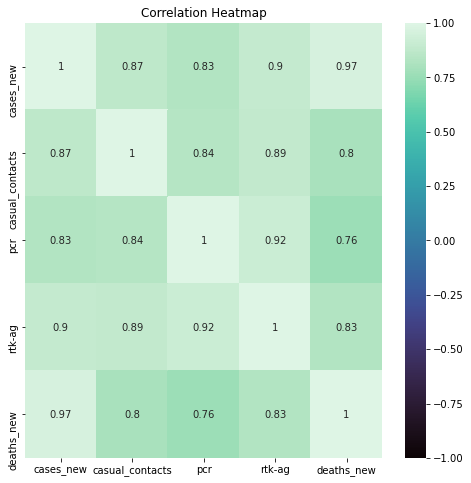

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=cleaned_df.corr()
plt.figure(figsize=(8,8))

sns.heatmap(corr,annot=True,vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

#### Description
From the correlation matrix, we can see that there is a high positive correlation between death and new cases. This shows that as the count of new cases increase, the reported new death cases also increases. The amount of new cases is also have a high correlation with the amount of testing done. Among the two tests, rtk-ag test have a higher correlation coefficient than pcr. This may show that there are more positive cases reported by rtk-ag in comparison with pcr. Casual contacts also have a high correlation to the amount of new cases. This shows that casual contacts contributes to the amount of new covid cases.

#### Dataset variables over time

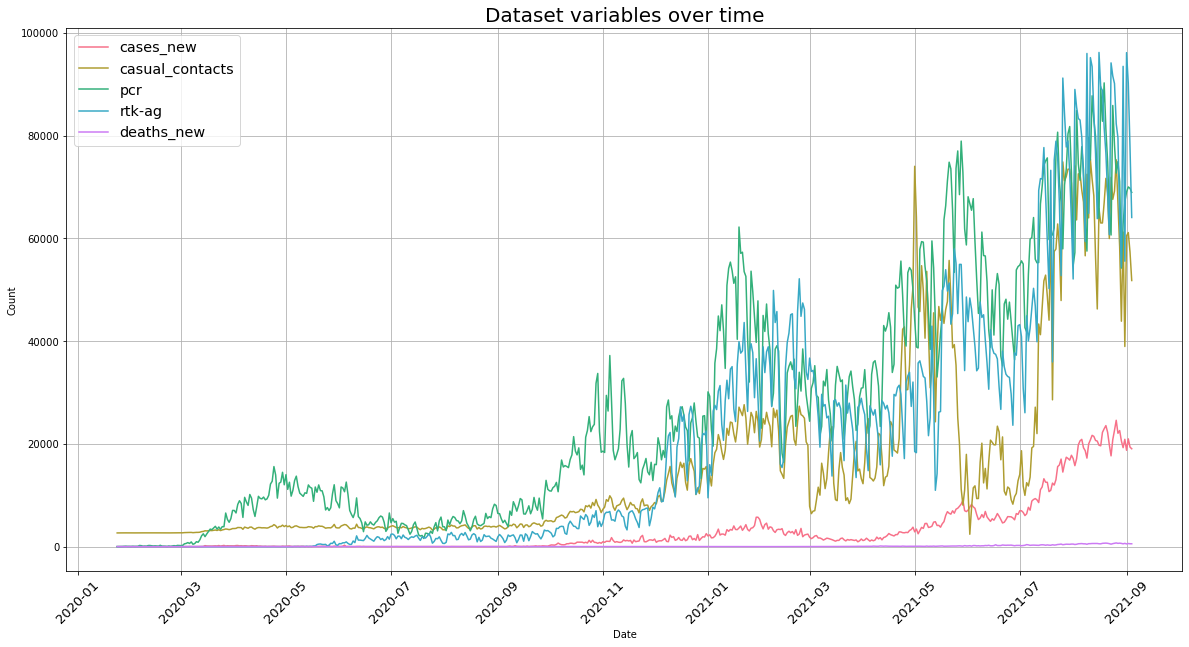

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,10))
plt.title('Dataset variables over time',fontsize=20)
plt.xticks(rotation=45,fontsize=13)
#sns.scatterplot(data=pd.melt(new_cases_and_tests, 'date'), x="date", y='value',hue='variable')
sns.lineplot(data=pd.melt(cleaned_df, 'date'), x="date", y='value',hue='variable',palette='husl')
plt.legend(fontsize='x-large', title_fontsize=20)

plt.xlabel('Date')
plt.ylabel('Count')

plt.grid()
plt.show()

##### Description
From the plot, we can see that the variables are having an upward trend as time progress. Notice the presence some occasional dips in the number of casual contacts everytime cases hits an all new time high which possibly due to the implementation of stricter Movement Control Order where people are refrained from travelling and even going out. This can be further seen on the filtered linegraph below.

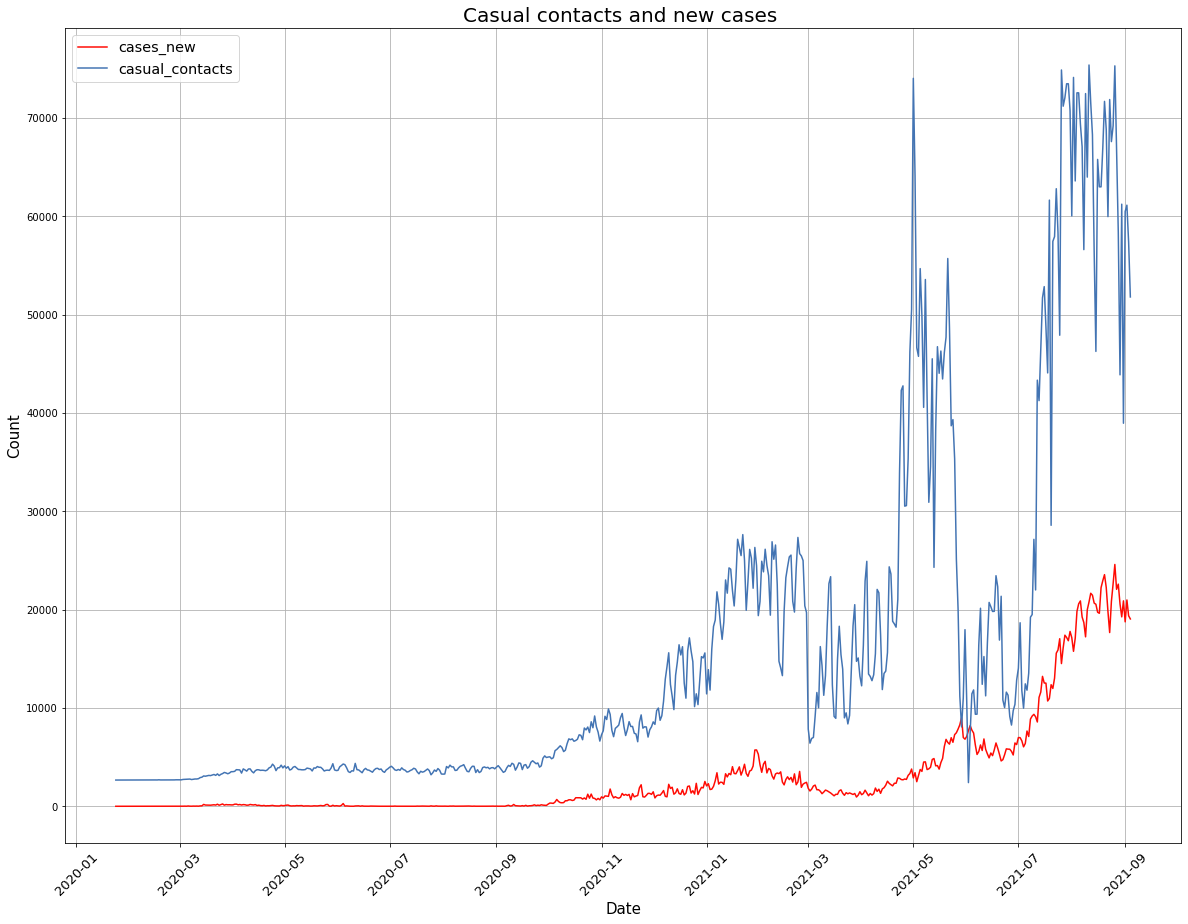

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,15))
plt.title('Casual contacts and new cases ',fontsize=20)
plt.xticks(rotation=45,fontsize=13)

colors = ["#FF0B04", "#4374B3"]


sns.lineplot(data=pd.melt(cleaned_df[['cases_new','casual_contacts','date']], 'date'),
             x="date",
             y='value',
             hue='variable',
             palette=colors
            )

plt.legend(fontsize='x-large', title_fontsize=10)

plt.xlabel('Date',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.grid()
plt.show()

## Herd immunity
The first part that we want to analyze is the herd immunity achieved in Malaysia. Based on the government's target, we need to have 80% of the population fully vaccinated against Covid-19 in order to achieve herd immunity.

### Data Cleaning

#### Making a backup of the DataFrame

Just in case something happen, we can revert to its original values without updating from the dataset link.

In [31]:
df_vaccination = vaccination_who.copy()
df_population = population.copy()

In [32]:
df_vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0


In [33]:
df_population.head()

,state,idxs,pop,pop_18,pop_60
0,Malaysia,0,32657400,23409600,3502000
1,Johor,1,3781000,2711900,428700
2,Kedah,2,2185100,1540600,272500
3,Kelantan,3,1906700,1236200,194100
4,Melaka,4,932700,677400,118500


#### Filter columns and rows

In [34]:
df_population = df_population[df_population['state']=='Malaysia']
df_vaccination = df_vaccination[df_vaccination['iso_code'] =='MYS']

In [35]:
df_vax_col = df_vaccination[['date', 'total_vaccinations', 'people_vaccinated' , 'people_fully_vaccinated','daily_vaccinations']]

#### Covert Date column into Datetime

In [36]:
df_vax_col['date'] = pd.to_datetime(df_vax_col['date'])

<ipython-input-36-eef09d30cdd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vax_col['date'] = pd.to_datetime(df_vax_col['date'])


#### Check for null values
If the rows with null values isn't that abundant, we can drop these rows

In [37]:
print(df_vax_col.isna().sum())

date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    4
daily_vaccinations         1
dtype: int64


In [38]:
df_vax_col.dropna(inplace=True)

<ipython-input-38-c9825b337e79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vax_col.dropna(inplace=True)


In [39]:
df_vax_col

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations
25166,2021-02-28,18721.0,18718.0,3.0,4665.0
25167,2021-03-01,34093.0,34086.0,7.0,6807.0
25168,2021-03-02,55749.0,55739.0,10.0,9282.0
25169,2021-03-03,78413.0,78398.0,15.0,11193.0
25170,2021-03-04,97954.0,97925.0,29.0,13821.0
...,...,...,...,...,...
25352,2021-09-02,35519754.0,20116694.0,15429300.0,340288.0
25353,2021-09-03,35841103.0,20264404.0,15606818.0,336621.0
25354,2021-09-04,36141604.0,20407355.0,15772760.0,330858.0
25355,2021-09-05,36431562.0,20548091.0,15926601.0,328910.0


### Visualization

#### Merging datasets

In [40]:
df_pop = df_population['pop']

In [41]:
df_vax_herd = df_vax_col.merge(df_pop, how='cross')

In [42]:
df_vax_col

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations
25166,2021-02-28,18721.0,18718.0,3.0,4665.0
25167,2021-03-01,34093.0,34086.0,7.0,6807.0
25168,2021-03-02,55749.0,55739.0,10.0,9282.0
25169,2021-03-03,78413.0,78398.0,15.0,11193.0
25170,2021-03-04,97954.0,97925.0,29.0,13821.0
...,...,...,...,...,...
25352,2021-09-02,35519754.0,20116694.0,15429300.0,340288.0
25353,2021-09-03,35841103.0,20264404.0,15606818.0,336621.0
25354,2021-09-04,36141604.0,20407355.0,15772760.0,330858.0
25355,2021-09-05,36431562.0,20548091.0,15926601.0,328910.0


#### Plot of Vaccination Progress in Malaysia

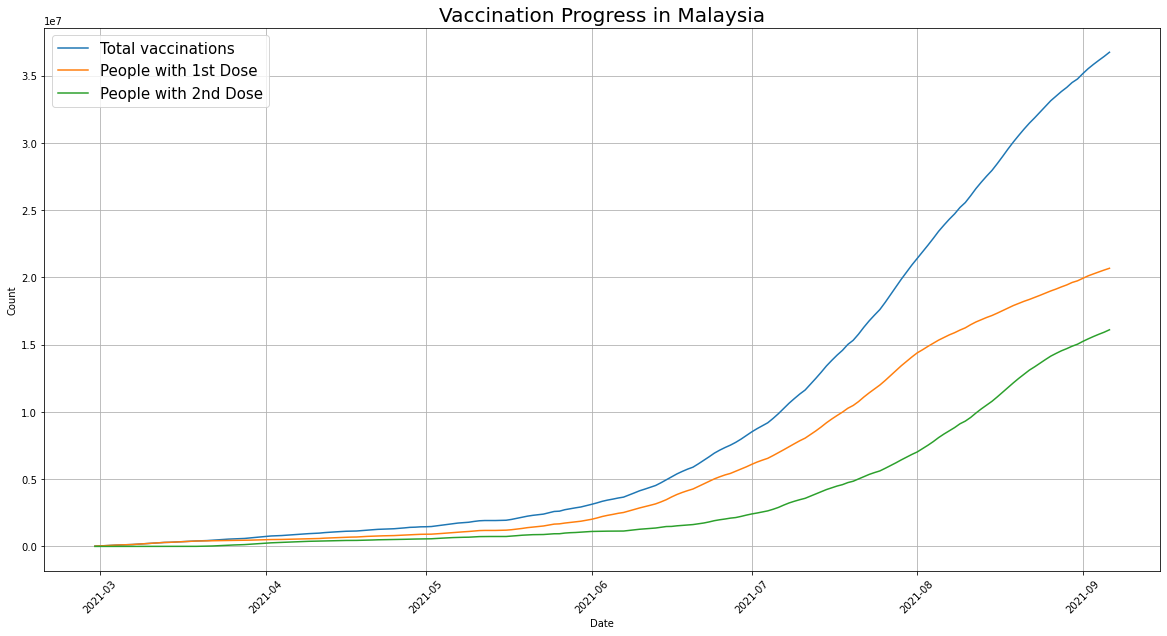

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,10))

date = df_vax_herd['date']
sns.lineplot(x=date, y=df_vax_herd['total_vaccinations'], label = "Total vaccinations")
sns.lineplot(x=date, y=df_vax_herd['people_vaccinated'], label = "People with 1st Dose")
sns.lineplot(x=date, y=df_vax_herd['people_fully_vaccinated'], label = "People with 2nd Dose")
#sns.lineplot(x=date, y=df_vax_herd['daily_vaccinations'], label = "Daily Vaccinations rate")

plt.title('Vaccination Progress in Malaysia', fontsize = 20)

plt.grid()
plt.xticks(rotation=45, fontsize = 10)
plt.xlabel('Date')

plt.yticks(fontsize = 10)
plt.ylabel('Count')

plt.legend(fontsize = 15)
plt.show()

#### Plot of Malaysia's Herd Immunity percentage
Equation Herd Immunity is as follows:

    Herd% = (Sum of Fully Vaccinated/Total Popuation) * 100

In [44]:
df_vax_herd['herd_immunity'] = (df_vax_herd['people_fully_vaccinated'] / df_vax_herd['pop']) * 100

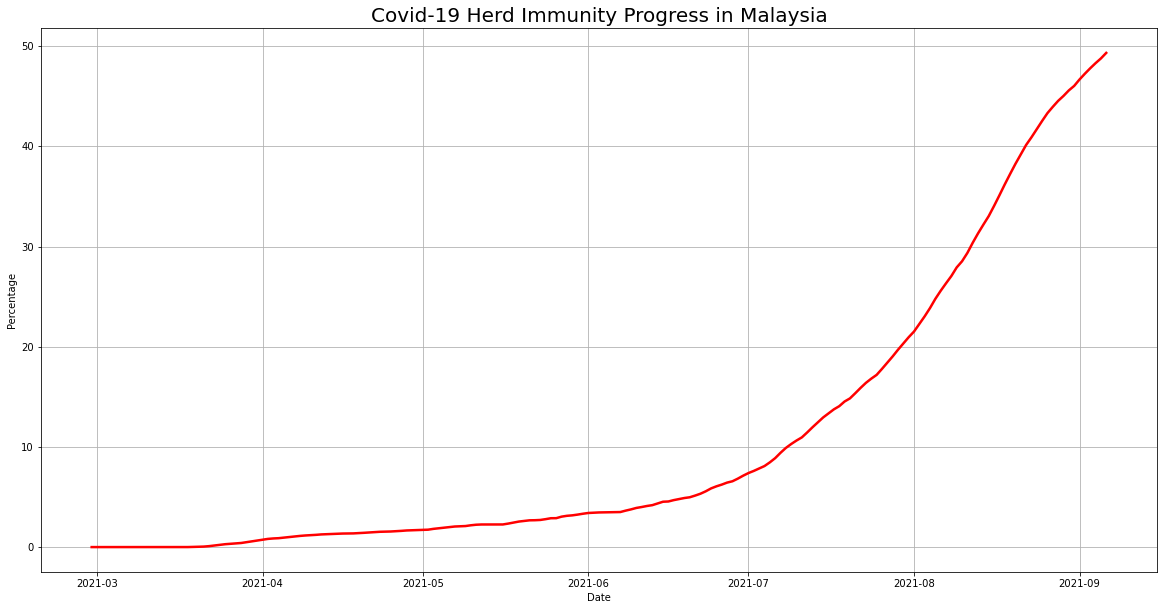

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,10))

sns.lineplot(data=df_vax_herd,x=df_vax_herd['date'],y=df_vax_herd['herd_immunity'],linewidth = 2.5,color='red')
plt.title("Covid-19 Herd Immunity Progress in Malaysia", fontsize=20)
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.grid()
plt.show()

##### Description:
The vaccine admnistration had exponentially increased with a slight decreased rate aproaching September 2021.

In [46]:
herd_immunity = (df_vax_herd['people_fully_vaccinated'].iloc[-1:,] / df_vax_herd['pop'].iloc[-1:,]) * 100

In [47]:
print("Malaysia's Herd Immunity Percentage: " + (herd_immunity.round(2).astype(str) + " %"))

190    Malaysia's Herd Immunity Percentage: 49.32 %
dtype: object


## Covid-19 cases by state
This section will narrow down the analysis into each state. 

### Count of new cases by state

#### Data Cleaning

In [48]:
df_state_cases=state_cases.copy()
df_death_public=deaths_public.copy()
df_death_state=deaths_state.copy()

In [49]:
df_state_cases.head()
#df_death_public.head()
#df_death_state.head()

,date,state,cases_new,cases_import,cases_recovered
0,2020-01-25,Johor,4,4,0.0
1,2020-01-25,Kedah,0,0,0.0
2,2020-01-25,Kelantan,0,0,0.0
3,2020-01-25,Melaka,0,0,0.0
4,2020-01-25,Negeri Sembilan,0,0,0.0


In [50]:
df_state_cases['date'] = pd.to_datetime(df_state_cases['date'])
df_death_public['date'] = pd.to_datetime(df_death_public['date'])
df_death_state['date'] = pd.to_datetime(df_death_state['date'])

In [51]:
df_state_cases.isna().sum()

date                 0
state                0
cases_new            0
cases_import         0
cases_recovered    160
dtype: int64

#### Visualization

##### Plot of New Cases from each State 

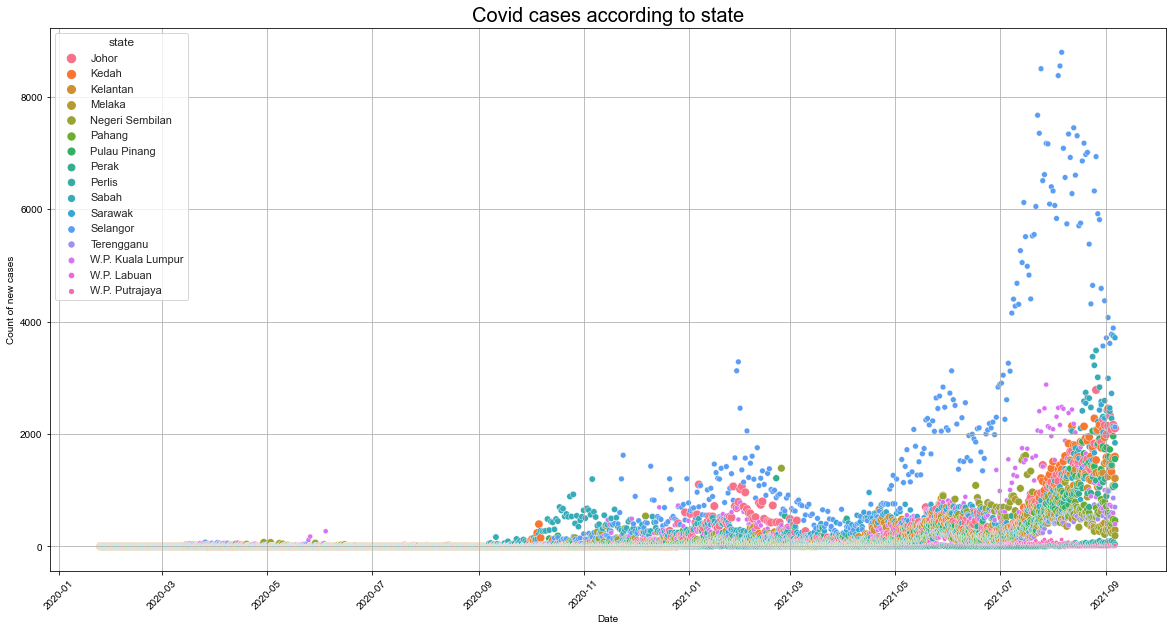

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,10))
plt.title("Covid cases according to state", fontsize=20)

sns.set_theme(style="ticks")
sns.scatterplot(y='cases_new', x='date',hue='state',size="state",data=df_state_cases)

plt.xlabel('Date')
plt.ylabel('Count of new cases')

plt.grid()
plt.xticks(rotation=45)
plt.show()

###### Description: 
The plot shows that Selangor had significatly more cases throughout the time.Around April 2021, there is a low dip after the second ATH that occured around February 2021, and continued to increase exponantially going forward.

### Tests by state

#### Preparing Data

In [53]:
df_tests_state = tests_state.copy()

##### Sum of tests by state

In [54]:
df_ts = df_tests_state.groupby(['state']).sum()

In [55]:
df_ts.reset_index(inplace=True)

##### Sum values both testing types

In [56]:
df_ts['total_test'] = (df_ts['rtk-ag'] + df_ts['pcr'])

#### Visualization

##### Plot of Total Covid Tests By State

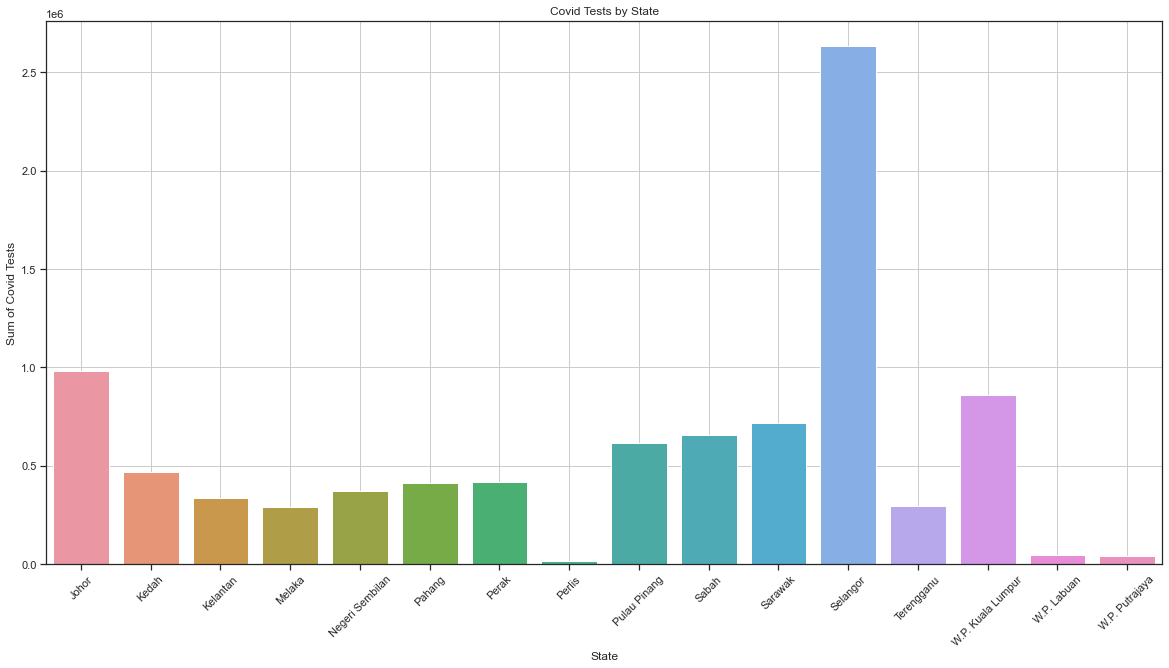

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10))
plt.title("Covid Tests by State")
sns.barplot(x="state", y="total_test", data=df_ts)
plt.grid()
plt.xlabel('State')
plt.ylabel('Sum of Covid Tests')
plt.xticks(rotation=45)
plt.show()

###### Description:
From the Covid Tests by State plot, we can see the top 3 states that have run the most test are Selangor, Johor, and, Sarawak. Despite being near to the Selangor state, W.P Putrajaya had significatly fewer tests done in the area.

# Covid-19 cases forecast
For the forecast, we wil make use of two procedures of forecasting which is first by using Prophet and then by using NeuralProphet. 

## Forecasting with Prophet

### Install dependecies

In [184]:
#Prophet Dependencies
#!pip install pystan==2.19.1.1
#!pip install prophet

In [185]:
#if unable to install
#conda install --override-channels -c main -c conda-forge boost

### Import Prophet

In [186]:
from prophet import Prophet

### Create y and ds DataFrame

In [187]:
#pdf=cleaned_df.copy()
pdf = df_cases.copy()
pdf.tail()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
579,2021-08-26,24599,8,22655,0.0,24.0,542.0,93.0,35.0,73.0,1944.0
580,2021-08-27,22070,15,21877,0.0,2.0,474.0,17.0,3.0,150.0,1022.0
581,2021-08-28,22597,12,19492,0.0,6.0,467.0,84.0,7.0,92.0,1505.0
582,2021-08-29,20579,7,20845,0.0,12.0,392.0,16.0,4.0,81.0,1458.0
583,2021-08-30,19268,16,21257,0.0,4.0,460.0,37.0,72.0,89.0,1034.0


In [188]:
pdf.dtypes

date                       datetime64[ns]
cases_new                           int64
cases_import                        int64
cases_recovered                     int64
cluster_import                    float64
cluster_religious                 float64
cluster_community                 float64
cluster_highRisk                  float64
cluster_education                 float64
cluster_detentionCentre           float64
cluster_workplace                 float64
dtype: object

In [189]:
pdf=pdf[['cases_new','date']]
pdf.columns = ['y', 'ds']

In [57]:
pdf.tail()

,y,ds
579,24599,2021-08-26
580,22070,2021-08-27
581,22597,2021-08-28
582,20579,2021-08-29
583,19268,2021-08-30


### Hyperparameter tuning

In [58]:
import itertools    
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


#cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(pdf)  # Fit model with given params
    df_cv = cross_validation(m, initial='467 days', horizon='90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2021-06-01 00:00:00 and 2021-06-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000206310261C0>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2021-06-01 00:00:00 and 2021-06-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000020630F727F0>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_s

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                     0.01  10921.661903
1                     0.001                     0.10  10919.509611
2                     0.001                     1.00  10922.932525
3                     0.001                    10.00  10922.933597
4                     0.010                     0.01  10436.432092
5                     0.010                     0.10  10454.540248
6                     0.010                     1.00  10416.027803
7                     0.010                    10.00  10388.626258
8                     0.100                     0.01   9407.677955
9                     0.100                     0.10   9493.458346
10                    0.100                     1.00   9520.645030
11                    0.100                    10.00   9485.789007
12                    0.500                     0.01   7509.463922
13                    0.500                     0.10   7498.12

In [59]:
import numpy as np
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0}


### Fit Prophet model

In [190]:
m = Prophet(interval_width=0.95,
        yearly_seasonality=True,
        #weekly_seasonality=True,
        seasonality_mode='additive',
        changepoint_prior_scale=0.5,
        seasonality_prior_scale=10
           )

#m.add_country_holidays(country_name='MY')


#m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

model = m.fit(pdf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [191]:
#print(m.train_holiday_names)

### Forecast Results

In [192]:
#do forecasting and view results
future = m.make_future_dataframe(periods=30,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-25,-1502.472873,-1203.062946,893.910368,-1502.472873,-1502.472873,1391.633483,1391.633483,1391.633483,124.582476,124.582476,124.582476,1267.051007,1267.051007,1267.051007,0.0,0.0,0.0,-110.839390
1,2020-01-26,-1429.346929,-1192.930931,833.350203,-1429.346929,-1429.346929,1153.950894,1153.950894,1153.950894,-111.781693,-111.781693,-111.781693,1265.732587,1265.732587,1265.732587,0.0,0.0,0.0,-275.396035
2,2020-01-27,-1356.220985,-1477.034897,618.404889,-1356.220985,-1356.220985,917.191560,917.191560,917.191560,-340.239836,-340.239836,-340.239836,1257.431397,1257.431397,1257.431397,0.0,0.0,0.0,-439.029424
3,2020-01-28,-1283.095041,-1207.599285,882.946217,-1283.095041,-1283.095041,1155.585080,1155.585080,1155.585080,-86.379951,-86.379951,-86.379951,1241.965031,1241.965031,1241.965031,0.0,0.0,0.0,-127.509961
4,2020-01-29,-1209.969097,-1009.384752,1069.025346,-1209.969097,-1209.969097,1258.893544,1258.893544,1258.893544,39.670032,39.670032,39.670032,1219.223512,1219.223512,1219.223512,0.0,0.0,0.0,48.924447


In [193]:
#view tail
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
609,2021-09-25,19866.414845,20634.434684,26150.146540,17321.585143,22901.588543,3380.779480,3380.779480,3380.779480,124.582476,124.582476,124.582476,3256.197004,3256.197004,3256.197004,0.0,0.0,0.0,23247.194325
610,2021-09-26,19957.572830,20130.609494,26207.417258,17253.248086,23173.709204,3112.683141,3112.683141,3112.683141,-111.781693,-111.781693,-111.781693,3224.464834,3224.464834,3224.464834,0.0,0.0,0.0,23070.255971
611,2021-09-27,20048.730815,19881.303817,26264.269832,17171.626612,23402.478726,2852.320910,2852.320910,2852.320910,-340.239836,-340.239836,-340.239836,3192.560747,3192.560747,3192.560747,0.0,0.0,0.0,22901.051725
612,2021-09-28,20139.888799,20167.106698,26689.837064,17120.444720,23734.217826,3074.241796,3074.241796,3074.241796,-86.379951,-86.379951,-86.379951,3160.621748,3160.621748,3160.621748,0.0,0.0,0.0,23214.130596
613,2021-09-29,20231.046784,20080.793640,27068.387395,17089.466718,23994.842698,3168.480850,3168.480850,3168.480850,39.670032,39.670032,39.670032,3128.810818,3128.810818,3128.810818,0.0,0.0,0.0,23399.527634


In [194]:
forecast[forecast['ds']=='2021-09-29']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
613,2021-09-29,20231.046784,20080.79364,27068.387395,17089.466718,23994.842698,3168.48085,3168.48085,3168.48085,39.670032,39.670032,39.670032,3128.810818,3128.810818,3128.810818,0.0,0.0,0.0,23399.527634


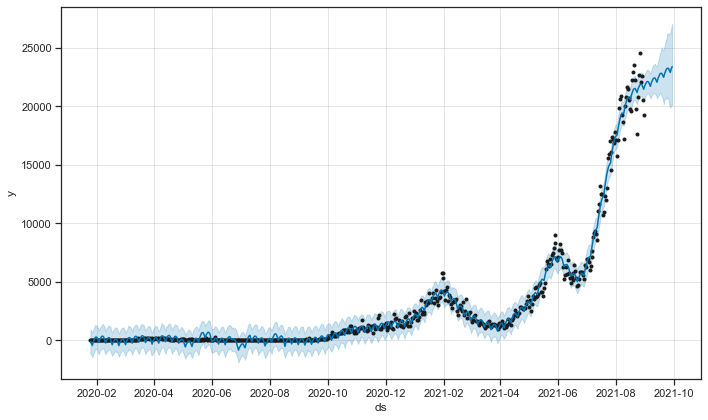

In [195]:
#plot the forecast
plot1 = m.plot(forecast)

#### Description:
From the component plot, we can see that there is currently an upward trend in the number of new Covid-19 cases in Malaysia. As for the next 30 days, it is expcted cases to be around 23399 cases with a 20080 lower bound of the uncertainty interval, and 27068 upper bound of the uncertainty interval

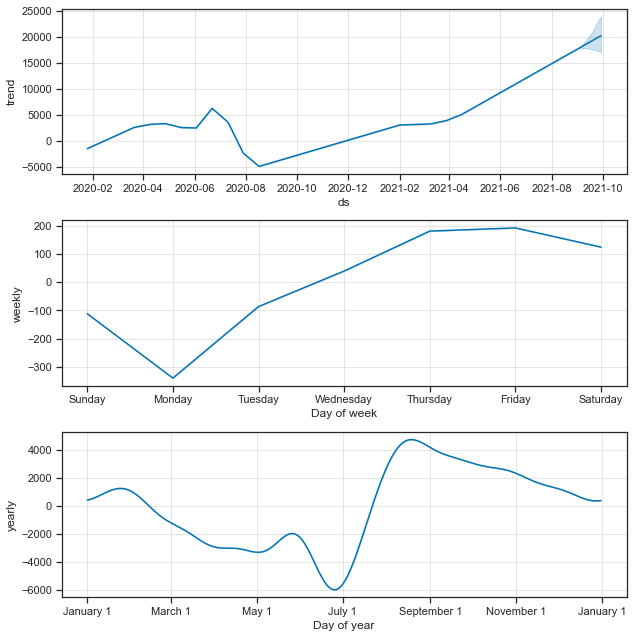

In [196]:
#plot the components
plt2 = m.plot_components(forecast)

#### Description:
From the componenets plot, we can see a strong uptrend from the beginning of August 2020 with a slowed rate around March 2021 before starting an increased rate afterwards. We can see that cases are mostylt lower at the start of the week and drops on Friday. There are also more cases happens around August and starts a downward trend going forward.

### Save model

In [197]:
import pickle
# save the model to disk
prophet_model_save = 'prophet_model.sav'
pickle.dump(m, open(prophet_model_save, 'wb'))